### Bike Sharing System - Multi Linear Regression

#### Problem Statement:

A bike-sharing system is a service where bikes are available for shared use to individuals on a short term basis for a price or free. Bike-sharing system allows people to borrow a bike from a  computer controlled "dock" where user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the Bike-sharing system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain the business in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end.

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profit.

BoomBikes wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-The variables which are significant in predicting the demand for shared bikes.

-How well those variables describe the bike demands


### Scope of Analysis:

It is required to model the demand for shared bikes with the available independent variables. It will be used by the BoomBikes management to understand how exactly the demands vary with different features. The model will help BoomBikse to manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Approach:

1. Reading, Understanding and visualizing the data
2. Preparing the data for modelling (train-test split, rescaling, etc.)
3. Building the model
4. Residual analysis
5. Prediction and evaluation on the test data

##### Source of Data:
Data are provided in the file “day.csv”. The "day.csv" file contains private data coming from BoomBikes. No additional details are expected to be analyzed as part of the study. 

#### Importing necessary Libraries for the Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

### Step 1. Reading, understanding and Visualizing the Data

In [2]:
# read the data from input file 'day.csv'
Bike = pd.read_csv('day.csv')
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
Bike.shape

(730, 16)

In [4]:
# Checking columns list
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for null values in dataset
Bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Independent variable "instant" gives index column and it can be dropped
Bike.drop(['instant'], axis=1, inplace=True)

#Independent variabl "dteday" covers day, month and year. For month and year,  there are separate columns. So, "dteday" can be dropped. it is assumed that day will not have impact on the output variable
Bike.drop(['dteday'], axis =1, inplace=True)

# Target variable is "cnt" which is sum of variables "casual" and "registered". Variables 'casual' and 'registered' can be dropped.
Bike.drop(['casual', 'registered'], axis = 1, inplace = True)

In [9]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#Renaming value of variable season for better clarity
Bike['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace = True)

#Renaming value of variable month for better clarity
Bike['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace =True)

#Renaming value of variable week day for better clarity. 0 is considered to be Tuesday as communicated
Bike.weekday = Bike.weekday.map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})

#Renaming value of variable weather for better clarity
Bike.weathersit = Bike.weathersit.map({1:'Clear,partly cloud',2:'Mist+cloud',3:'Lightsnow+rain',4:'Heavy rain+Ice'})

#Names of variables with values of 0 or 1 are not renamed as they can be used for analysis as it is.

In [11]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist+cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist+cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,"Clear,partly cloud",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,"Clear,partly cloud",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,"Clear,partly cloud",9.305237,11.46350,43.6957,12.522300,1600


In [12]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Visualization of Data

#### The below pairplot is to understand relationship between numerical variables

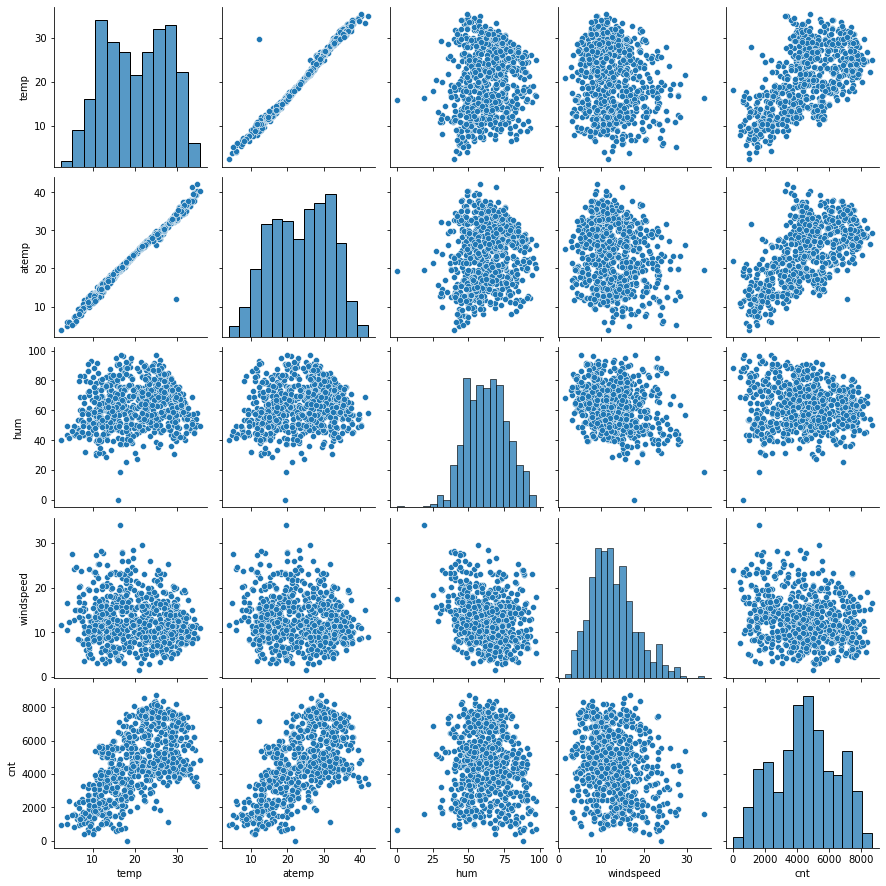

In [13]:
sns.pairplot(Bike, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] )
plt.show()

From the above plot, it can be understood that there is very close linear relationship between temp and atemp. Also it appears that there is a good relationship between cnt and temp/atemp

#### The below plots are to visualize details of categorical variables

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

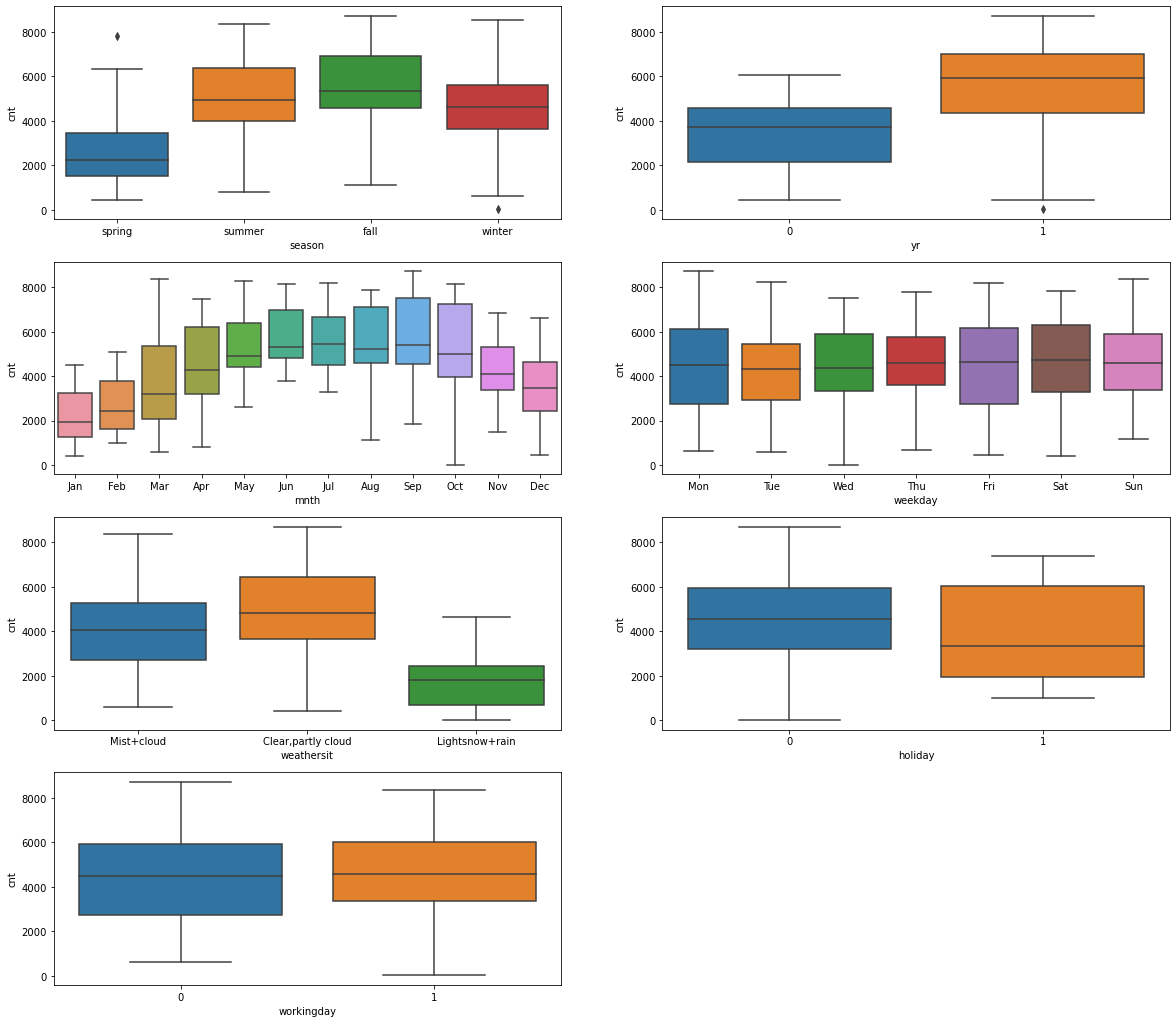

In [14]:
plt.figure(figsize=(20,18))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=Bike)
plt.subplot(4,2,2)
sns.boxplot(x='yr', y='cnt', data=Bike)
plt.subplot(4,2,3)
sns.boxplot(x='mnth', y='cnt', data=Bike)
plt.subplot(4,2,4)
sns.boxplot(x='weekday', y='cnt', data=Bike)
plt.subplot(4,2,5)
sns.boxplot(x='weathersit', y='cnt', data=Bike)
plt.subplot(4,2,6)
sns.boxplot(x='holiday', y='cnt', data=Bike)
plt.subplot(4,2,7)
sns.boxplot(x='workingday', y='cnt', data=Bike)

From the above plots for both 2018 & 2019, it is understood for bike sharing that

-Median value is highest in fall season and it is likely to have maximum Bike sharing count in fall season.

-Median value is higher in year 2019 and Bike sharing increased from 2018 to 2019

-Median value is highest in July month and it is likely to have high Bike sharing count in May-October. 

-Median value is highest on Saturday and it is likely to have Bike sharing count is more or less same for all days except         Tuesday and wednesday. 

-Median value is highest in clear+partly cloud weather and it is likely to have maximum Bike sharing count when sky is clear +   partly clouded

-Median value is higher for non-holiday

-Median value is more or less same for working day and Bike sharing count may not change based on working day or not.

The below bar plots are to understand distribution of Bike sharing based on individual categorical variables

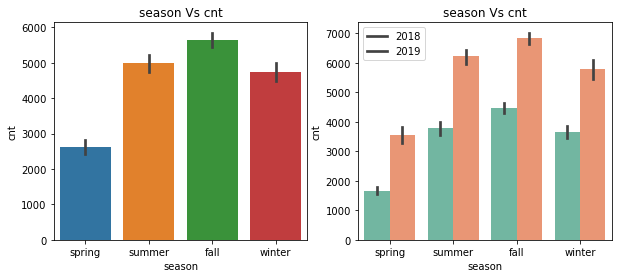

In [15]:
# Plot for Season Vs cnt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('season Vs cnt')
sns.barplot(x='season', y='cnt', data=Bike)
plt.subplot(1,2,2)
plt.title('season Vs cnt')
sns.barplot(x='season', y='cnt', data=Bike, hue='yr', palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

From the above plot, it is understood that Bike sharing appears to be highest in fall season and Bike sharing increased in all seasons from 2018 to 2019

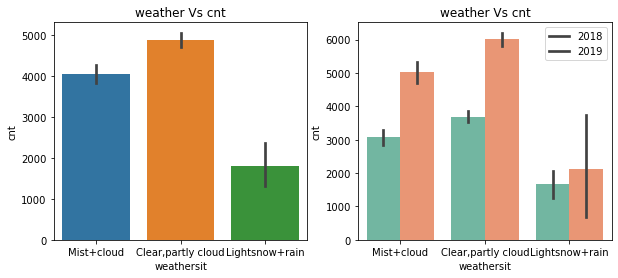

In [16]:
# Plot for weather Vs cnt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('weather Vs cnt')
sns.barplot(x='weathersit', y='cnt', data=Bike)
plt.subplot(1,2,2)
plt.title('weather Vs cnt')
sns.barplot(x='weathersit', y='cnt', data=Bike, hue='yr', palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

From the above plot, it is understood that Bike sharing count appears to be highest when weather is with clear sky/partly clouded and the Bike sharing count increased in all weathers from 2018 to 2019

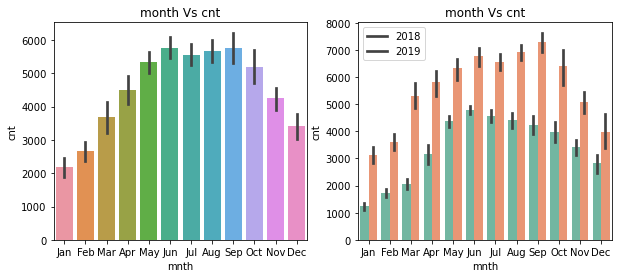

In [17]:
# Plot for month Vs cnt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('month Vs cnt')
sns.barplot(x='mnth', y='cnt', data=Bike)
plt.subplot(1,2,2)
plt.title('month Vs cnt')
sns.barplot(x='mnth', y='cnt', data=Bike, hue='yr', palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

From the above plot, it is understood that Bike sharing count increased in all months from 2018 to 2019. Maximum bike sharing appears to be in May-October for 2018 and Sep for 2019.

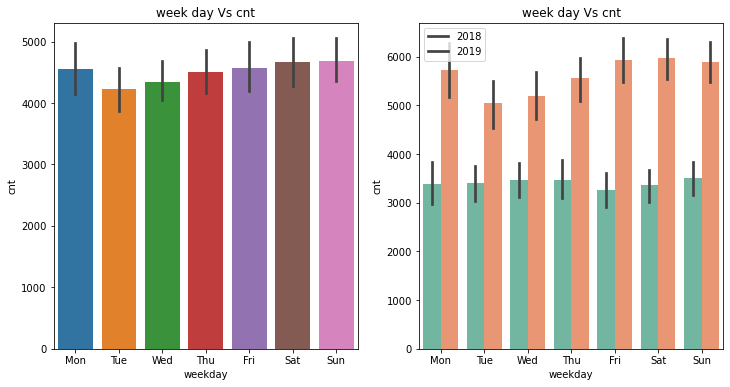

In [18]:
# Plot for Weekday Vs cnt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('week day Vs cnt')
sns.barplot(x='weekday', y='cnt', data=Bike)
plt.subplot(1,2,2)
plt.title('week day Vs cnt')
sns.barplot(x='weekday', y='cnt', data=Bike, hue='yr', palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

From the above plot, it is understood that Bike sharing appears to be highest on Sunday and lowest on Tuesday for combined 2018 & 2019. Bike sharing count increased in all days in 2019

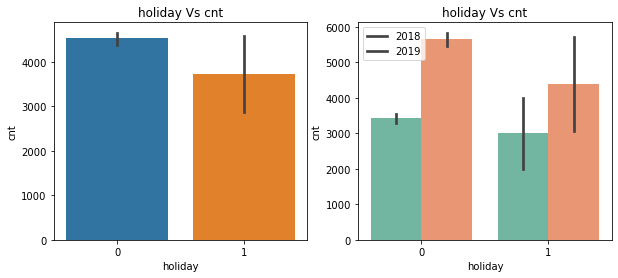

In [19]:
# Plot for holiday Vs cnt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('holiday Vs cnt')
sns.barplot(x='holiday', y='cnt', data=Bike)
plt.subplot(1,2,2)
plt.title('holiday Vs cnt')
sns.barplot(x='holiday', y='cnt', data=Bike, hue='yr', palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

From the above plot, it is understood that Bike sharing appears to be less on holiday(May be due to less number of holidays and people  may prefer to spend time with family). Bike sharing count increased from 2018 to 2019. No further analysis performed to check whether Bike sharing count per day is more or less.

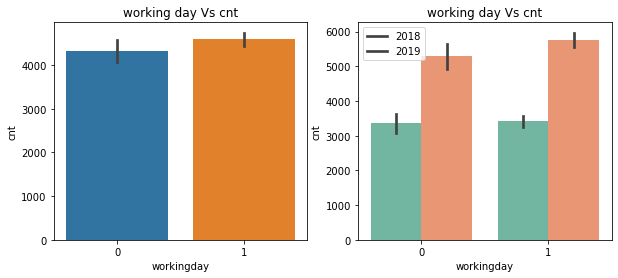

In [20]:
# Plot for working day Vs cnt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('working day Vs cnt')
sns.barplot(x='workingday', y='cnt', data=Bike)
plt.subplot(1,2,2)
plt.title('working day Vs cnt')
sns.barplot(x='workingday', y='cnt', data=Bike, hue='yr', palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

From the above plot, it is understood that Bike sharing appears to be higher on working day. Bike sharing count increased from 2018 to 2019.

### Step 2: Data preparation for modelling

Preparing the data for multiple linear regression. 

-Encoding categorical variables (season, mnth, weekday and weathersit) to dummy variables

-Splitting into train and test sets

-Rescaling of variables

#### Dummy Variables

#Creating dummy variables for season, mnth, weekday and weathersit to remove redundant variable and adding the dummy variables with dataframe.

In [21]:
# Creating dummy variables for season , mnth, weekday and weathersit
season_dum = pd.get_dummies(Bike['season'], drop_first=True)
mnth_dum = pd.get_dummies(Bike['mnth'], drop_first=True)
weekday_dum = pd.get_dummies(Bike['weekday'], drop_first=True)
weathersit_dum = pd.get_dummies(Bike['weathersit'], drop_first=True)

#Adding dummy variable to the dataframe 'Bike'
Bike_mod = pd.concat([Bike,season_dum,mnth_dum,weekday_dum,weathersit_dum], axis=1)

In [22]:
Bike_mod.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Lightsnow+rain,Mist+cloud
0,spring,0,Jan,0,Mon,0,Mist+cloud,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,0,Mist+cloud,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,"Clear,partly cloud",8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,"Clear,partly cloud",8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,"Clear,partly cloud",9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Dropping redundant variables season , mnth, weekday and weathersit as they are created with dummy variables
Bike_mod.drop(['season', 'mnth', 'weekday', 'weathersit'],axis=1, inplace=True)


In [24]:
Bike_mod.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Lightsnow+rain,Mist+cloud
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# checking info of modified dataframe
Bike_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

#### Splitting the data into train and test sets

Train set will be used to build the linear regression model and test set will be used to validate the regression model

In [26]:
Bike_mod_train, Bike_mod_test = train_test_split(Bike_mod, train_size =0.7, random_state=100)
print(Bike_mod_train.shape)
print(Bike_mod_test.shape)

(510, 30)
(220, 30)


#### Rescaling of Variables

There are two methods. 1. min-max scaling   2. standardization

min-max scaling approach is adopted in the rescaling

In [27]:
# Instantiate an object
scaler = MinMaxScaler()

# Creating a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#fitting the data
Bike_mod_train[num_vars] = scaler.fit_transform(Bike_mod_train[num_vars])
Bike_mod_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Lightsnow+rain,Mist+cloud
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [28]:
Bike_mod_train.describe()    

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Lightsnow+rain,Mist+cloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


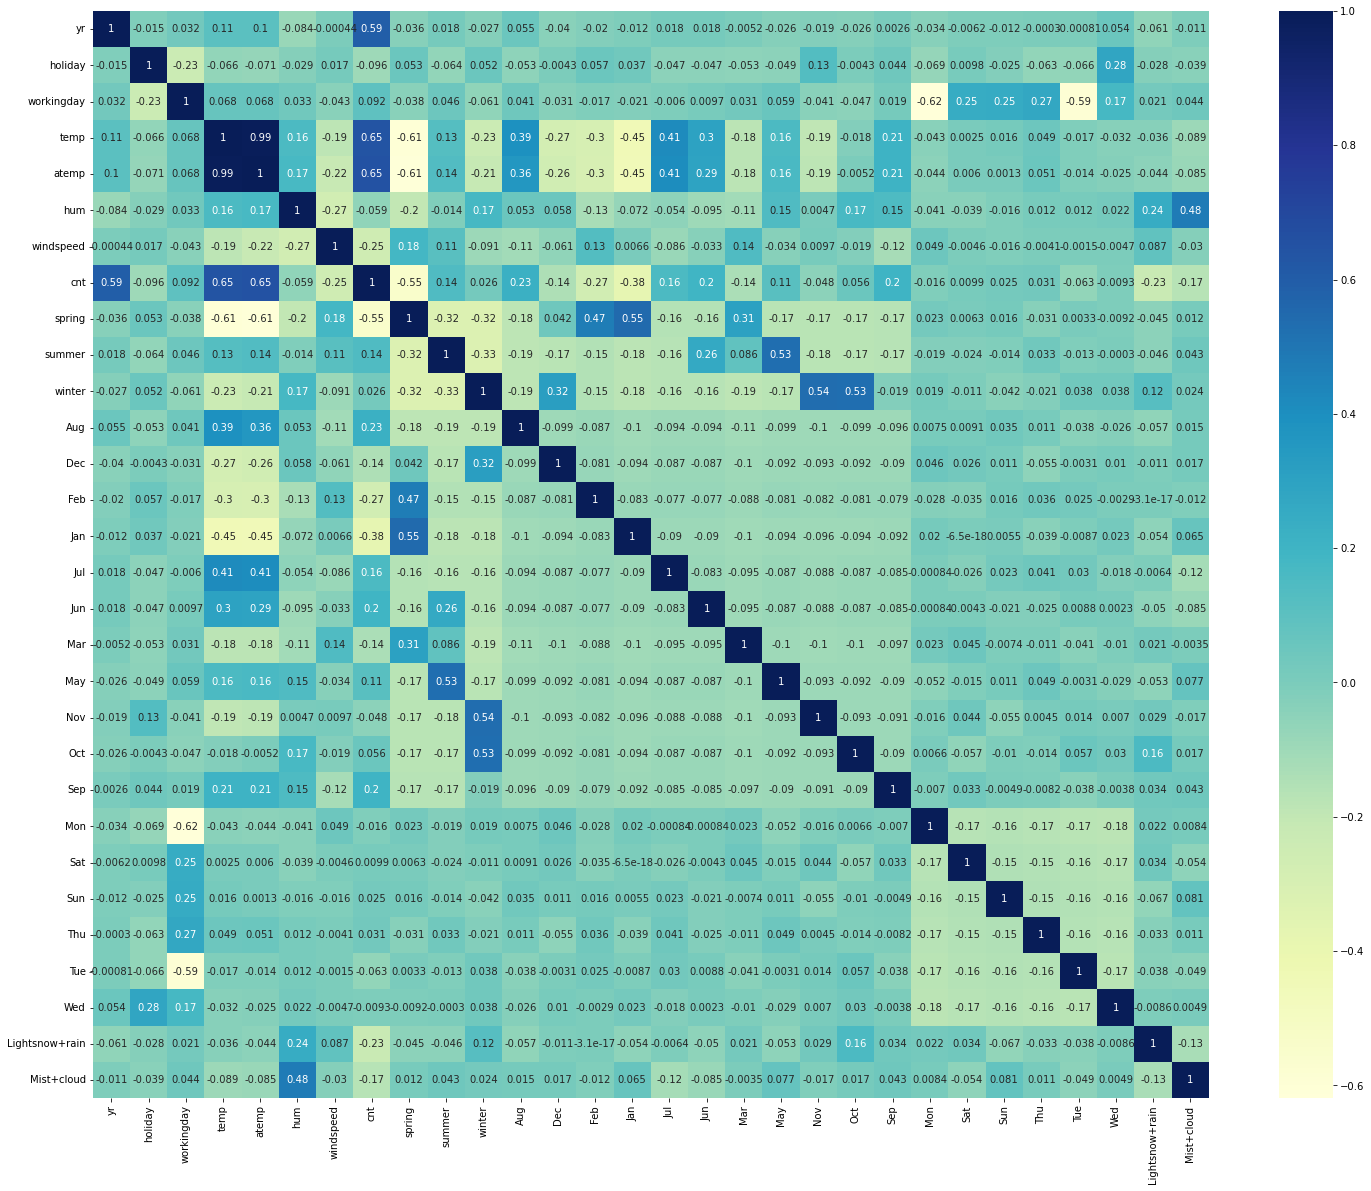

In [29]:
# Understanding correlation co-efficients among the variables using heat map
plt.figure(figsize=(25,20))
sns.heatmap(Bike_mod_train.corr(), annot=True, cmap = 'YlGnBu')
plt.show()



##### The target variable 'cnt' has good positive correlation with independent variables year, temp and atemp.  Also the target variable has reasonable positive correlation with independent variables summer, Jul, Jun and Sep 

In [30]:
# Checking all columns
Bike_mod.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Lightsnow+rain', 'Mist+cloud'],
      dtype='object')

In [31]:
# Creating x_train and y_train
y_train = Bike_mod_train.pop('cnt')  # Taking only 'cnt' as y_train
x_train = Bike_mod_train  # All columns without 'cnt' column
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Lightsnow+rain,Mist+cloud
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [32]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [33]:
#Checking details of x_train
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Lightsnow+rain,Mist+cloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 3: Building the Model

We will use LinearRegression function from SciKitLearn with RFE (Recursive Feature Elimination) 

In [34]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable to 15
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train)

In [36]:
# Ranking variables to select for analysis
list(zip(x_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 14),
 ('Sun', False, 11),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('Lightsnow+rain', True, 1),
 ('Mist+cloud', True, 1)]

In [37]:
# To see the columns which are considered for analysis based on RFE
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Mon', 'Lightsnow+rain',
       'Mist+cloud'],
      dtype='object')

In [38]:
# To see the columns which were dropped
x_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [39]:
# creating user defined fucntion to check VIF (Variance inflation factor)
def calc_VIF(df):
    vif=pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [40]:
# Creating train dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [41]:
# checking VIF for the selected variables
calc_VIF(x_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,Mist+cloud,2.29
0,yr,2.09
12,Mon,1.98


VIF values of hum, temp and workingday are greater than 5. it is targetted to use variables with VIF of <= 5 in the final regression model.

In [42]:
# Adding constant to the dataframe
x_train_sm = sm.add_constant(x_train_rfe)

#Creating 1st linear regression model
lr1 = sm.OLS(y_train, x_train_sm)

#fitting model
lr1_model = lr1.fit()
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.22e-191
Time:                        21:07:46   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.969      0.000       0.181       0.323
yr                 0.2305      0.008     28.795      0.000       0.215       0.246
holiday           -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday         0.0433      0.012      3.762      0.000       0.021       0.066
temp               0.5096      0.034     14.837      0.000       0.442       0.577
hum               -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed         -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer             0.0508      0.015      3.423      0.001       0.022       0.080
winter             0.0933      0.017      5.403      0.000       0.059       0.127
Jan               -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep                0.0814      0.016      4.945      0.000       0.049       0.114
Mon                0.0536      0.014      3.694      0.000       0.025       0.082
Lightsnow+rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist+cloud        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Highest p-value is 0.047 for variable 'jan' which is close to 5%. lets drop it.
x_train_new = x_train_rfe.drop(['Jan'], axis =1)

# checking VIF for the selected variables after removing variable 'Jan'
calc_VIF(x_train_new)


,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.42
7,summer,2.85
13,Mist+cloud,2.29
0,yr,2.08
11,Mon,1.97


In [44]:
# Adding constant to the dataframe
x_train_sm = sm.add_constant(x_train_new)

# Creating 2nd linear regression model
lr2 = sm.OLS(y_train, x_train_sm)

# fitting model
lr2_model = lr2.fit()
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        21:07:46   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2402      0.036      6.714      0.000       0.170       0.310
yr                 0.2298      0.008     28.647      0.000       0.214       0.246
holiday           -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday         0.0430      0.012      3.725      0.000       0.020       0.066
temp               0.5277      0.033     15.884      0.000       0.462       0.593
hum               -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed         -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring            -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer             0.0537      0.015      3.631      0.000       0.025       0.083
winter             0.0992      0.017      5.815      0.000       0.066       0.133
Jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep                0.0820      0.017      4.966      0.000       0.050       0.114
Mon                0.0530      0.015      3.648      0.000       0.024       0.082
Lightsnow+rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist+cloud        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Highest p-value is 0.029 for variable 'holiday' which is less than 0.05. The confidence level is more than 95%.

# variable 'hum' is with highest VIF value. lets drop the variable first. 
x_train_new = x_train_new.drop(['hum'], axis =1)

# checking VIF for the selected variables after removing variable 'hum'
calc_VIF(x_train_new)


,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.34
0,yr,2.07
7,winter,1.98
10,Mon,1.96
8,Jul,1.58
12,Mist+cloud,1.57


In [46]:
# Adding constant to the dataframe
x_train_sm = sm.add_constant(x_train_new)

# Creating 3rd linear regression model
lr3 = sm.OLS(y_train, x_train_sm)

# fitting model
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.28e-188
Time:                        21:07:46   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1576      0.031      5.126      0.000       0.097       0.218
yr                 0.2337      0.008     28.828      0.000       0.218       0.250
holiday           -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday         0.0461      0.012      3.931      0.000       0.023       0.069
temp               0.4915      0.033     15.027      0.000       0.427       0.556
windspeed         -0.1491      0.025     -6.024      0.000      -0.198      -0.100
spring            -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer             0.0477      0.015      3.180      0.002       0.018       0.077
winter             0.0846      0.017      4.971      0.000       0.051       0.118
Jul               -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Sep                0.0759      0.017      4.537      0.000       0.043       0.109
Mon                0.0579      0.015      3.924      0.000       0.029       0.087
Lightsnow+rain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Mist+cloud        -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Highest p-value is 0.039 for variable 'holiday' which is less than 0.05. The confidence level is more than 95%.

# variable 'workingday' is with high VIF (5.20) value now. lets drop the 'workingday' variable. 
# Note that variable 'temp' is not dropped as we noticed significant correlation between target variable (cnt) and independent variable (temp)
x_train_new = x_train_new.drop(['workingday'], axis =1)

# checking VIF for the selected variables after removing the variable
calc_VIF(x_train_new)

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,summer,2.23
4,spring,2.10
0,yr,2.07
6,winter,1.79
7,Jul,1.58
11,Mist+cloud,1.55
8,Sep,1.34
9,Mon,1.19


In [48]:
# Adding constant to the dataframe
x_train_sm = sm.add_constant(x_train_new)

# Creating 4th linear regression model
lr4 = sm.OLS(y_train, x_train_sm)

# fitting model
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.68e-186
Time:                        21:07:46   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1960      0.030      6.628      0.000       0.138       0.254
yr                 0.2340      0.008     28.451      0.000       0.218       0.250
holiday           -0.0941      0.026     -3.605      0.000      -0.145      -0.043
temp               0.4924      0.033     14.839      0.000       0.427       0.558
windspeed         -0.1500      0.025     -5.974      0.000      -0.199      -0.101
spring            -0.0670      0.021     -3.174      0.002      -0.108      -0.026
summer             0.0468      0.015      3.078      0.002       0.017       0.077
winter             0.0816      0.017      4.733      0.000       0.048       0.115
Jul               -0.0525      0.019     -2.820      0.005      -0.089      -0.016
Sep                0.0766      0.017      4.515      0.000       0.043       0.110
Mon                0.0199      0.011      1.761      0.079      -0.002       0.042
Lightsnow+rain    -0.2846      0.025    -11.529      0.000      -0.333      -0.236
Mist+cloud        -0.0803      0.009     -9.176      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       65.293   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.851
Skew:                          -0.706   Prob(JB):                     2.60e-31
Kurtosis:                       5.152   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Highest p-value is 0.079 for variable 'Mon' which is more than 0.05.

#  lets drop the 'Mon' variable. 
x_train_new = x_train_new.drop(['Mon'], axis =1)

# checking VIF for the selected variables after removing the variable
calc_VIF(x_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,Jul,1.58
10,Mist+cloud,1.55
8,Sep,1.34
9,Lightsnow+rain,1.08


In [50]:
# Adding constant to the dataframe
x_train_sm = sm.add_constant(x_train_new)

# Creating 5th linear regression model
lr5 = sm.OLS(y_train, x_train_sm)

# fitting model
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.06e-187
Time:                        21:07:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.746      0.000       0.141       0.258
yr                 0.2336      0.008     28.352      0.000       0.217       0.250
holiday           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp               0.4910      0.033     14.770      0.000       0.426       0.556
windspeed         -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring            -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer             0.0465      0.015      3.051      0.002       0.017       0.076
winter             0.0817      0.017      4.730      0.000       0.048       0.116
Jul               -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep                0.0768      0.017      4.517      0.000       0.043       0.110
Lightsnow+rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist+cloud        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As p-value is significantly less (<=0.005) and VIF values are less (<=5) for all dependent variables, the above model is considered to be final model. it should also be noted that both R-squared and Adjusted R-squared values are 0.83 which is good. Also Prob(F-Statistics) value is also almost zero.

In [51]:
# Checing the coefficient values of lr6 model
lr5_model.params


const             0.199434
yr                0.233570
holiday          -0.097463
temp              0.490988
windspeed        -0.147919
spring           -0.067169
summer            0.046487
winter            0.081741
Jul              -0.052057
Sep               0.076846
Lightsnow+rain   -0.284199
Mist+cloud       -0.080167
dtype: float64

### Step 4: Residual analysis

Checking if the error terms are also normally distributed (which is one of the major assumptions of linear regression)through histogram plot of the error terms

In [52]:
x_train_sm

,const,yr,holiday,temp,windspeed,spring,summer,winter,Jul,Sep,Lightsnow+rain,Mist+cloud
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,1


In [53]:
y_train_cnt = lr5_model.predict(x_train_sm)

Text(0.5, 0, 'Error')

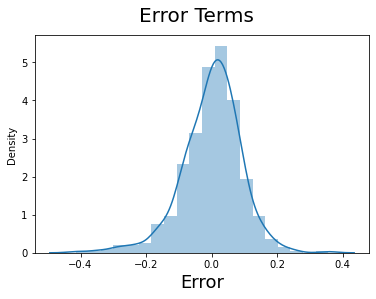

In [54]:
# plotting histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_cnt), bins =20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Error', fontsize = 18)

#### Checking the patten in residual

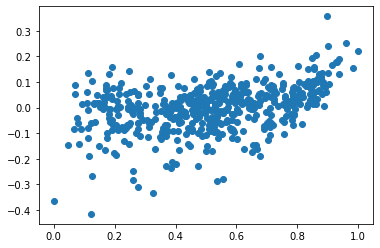

In [55]:
# calculating residual between y_train and y_train_cnt
res = y_train - y_train_cnt

# plotting for patterns in residuals
plt.scatter(y_train, res)

### Step 5: Prediction and evaluation on the test data

#### Applying the scaling on the test data set

In [56]:
# Applying scaling on the test data set
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
Bike_mod_test[num_vars] = scaler.transform(Bike_mod_test[num_vars])
Bike_mod_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Lightsnow+rain,Mist+cloud
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [57]:
Bike_mod_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Lightsnow+rain,Mist+cloud
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing x_test and y_test

In [58]:
y_test = Bike_mod_test.pop('cnt')
x_test = Bike_mod_test

#### Apply model to make prediction in test data

In [59]:
# Creating x_test_new dataframe by dropping variable from x_test
x_test_new = x_test[x_train_new.columns]

# Adding constant
x_test_new = sm.add_constant(x_test_new)

In [60]:
# making prediction
y_test_pred = lr5_model.predict(x_test_new)

In [61]:
# Finding r2 for test data
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.805268034904855

In [62]:
# Finding r2 for train data
r2_score(y_true = y_train, y_pred = y_train_cnt)

0.835281973840364

In [63]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = (1-(1-r2)*(x_test_new.shape[0]-1)/(x_test_new.shape[0]-x_test_new.shape[1]-1-2))
print(adjusted_r2)

0.7919692665568938


##### The difference between r2_square values of test set (0.805) and train set(0.835) is less than 5%, the prediction model is considered to be good

#### Comparison of R2 and Adjusted R2 for train and test data sets

R2 for train data set : 0.835

R2 for test data set   : 0.805

Adjusted R2 for train data set : 0.832

Adjusted R2 for test  data set  : 0.792

### Evaluation of Model

Plotting test data and predicted data to understand the spread

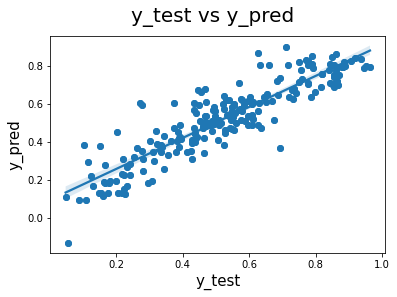

In [64]:
# plotting y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) # plotting heading title
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15)
plt.show()


In [65]:
print(round(lr5_model.params,4))

const             0.1994
yr                0.2336
holiday          -0.0975
temp              0.4910
windspeed        -0.1479
spring           -0.0672
summer            0.0465
winter            0.0817
Jul              -0.0521
Sep               0.0768
Lightsnow+rain   -0.2842
Mist+cloud       -0.0802
dtype: float64


#### Finding equation based on the co-efficients

cnt = 0.1994 + 0.2336 x yr - 0.0975 x holiday + 0.4910 x temp - 0.1479 x windspeed - 0.0672 x spring + 0.0465 x summer + 0.0817 x winter - 0.0521 x Jul + 0.0768 x Sep - 0.2842 x Lightsnow+raing - 0.0802 x Mist+cloud

#### Bike sharing demand is mainly dependent on variables yr, holiday, temp, windspeed, spring, summer, winter, Jul, Sep, Lightsnow+rain and Mist+cloud.

#### Independent variables yr, temp, summer, winter and sep have positive impact on Bike sharing count as per the model built. While deciding the sales strategy, these variables should be taken into account to increase the sales.